In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from random import sample, choice
from scipy.io import loadmat
import numpy as np
import re
import glob
import os
import seaborn as sns; sns.set()
from sklearn.preprocessing import normalize

In [2]:
"""
Author: Trevor Jordan Grant.
default4: spatial/verbal
"""
# Dictionary is labeled such that task labels in conditions files will have
# more than one multilabeling schema.

# To add more multilabeling schema - include them in the task Dictionary.
# (The sub-dictionary where the task label is the key.)

# default4 = ["VerbalWM", "SpatialWM", "VisualPerceptual", "AuditoryPerceptual"]
# every label in default 4 has discrete values of 'off', 'low', 'high'

# default3 = ["WM", "VisualPerceptual", "AuditoryPerceptual"]
# every label in default 3 has discrete values of 'off', 'low', 'high'

cog_load_label_dict = {
# Mindfulness task labels.
                       "nb": {
                              "default4": ["high", "off", "low", "off"],
                              "default3": ["high", "low", "off"],
                             },
                       "anb": {
                               "default4": ["high", "off", "off", "low"],
                               "default3": ["high", "off", "low"],
                              },
                       "ewm": {
                               "default4": ["low", "off", "high", "off"],
                               "default3": ["low", "high", "off"]
                              },
                        "cr": {
                               "default4": ["off", "off", "off", "off"],
                               "default3": ["off", "off", "off"],
                              },
                        "rt": {
                               "default4": ["off", "off", "low", "off"],
                               "default3": ["off", "low", "off"],
                              },
                        "es": {
                               "default4": ["off", "off", "low", "off"],
                               "default3": ["off", "low", "off"],
                              },
                       "gng": {
                               "default4": ["off", "off", "low", "off"],
                               "default3": ["off", "low", "off"],
                              },
            "adaptive_words": {
                               "default4": ["off", "off", "low", "off"],
                               "default3": ["off", "low", "off"],
                              },
                   "go_nogo": {
                               "default4": ["off", "off", "low", "off"],
                               "default3": ["off", "low", "off"],
                              },
                     "nback": {
                               "default4": ["high", "off", "low", "off"],
                               "default3": ["high", "low", "off"],
                              },
                    "posner": {
                               "default4": ["off", "off", "low", "off"],
                               "default3": ["off", "low", "off"],
                              },
                 "simple_rt": {
                               "default4": ["off", "off", "low", "off"],
                               "default3": ["off", "low", "off"],
                              },
             "visual_search": {
                               "default4": ["off", "off", "high", "off"],
                               "default3": ["off", "high", "off"],
                              },
                      }


def strings_to_vectors(string_labels, as_list=False):
    """Maps strings in dict to interger values.
    Args:
        string_labels(list): The string label value of load.
        as_list(bool): False, if True, return list instead of np.array()
    Returns:
        labels as np.array()
    """

    maps = {
            "off": 0,
            "low": 1,
            "high": 2,
           }

    if as_list:
        return [maps[label] for label in string_labels]
    return np.array([maps[label] for label in string_labels])


def return_label(task, label_type="default3", as_strings=False):
    """Returns a label from the cog_load_label_dict.
    Args:
        task(str): The task label from the coditions file.
        label_type(string): The label schema used for the model.
        as_strings(bool): False, if True, return string (in list) values instead.
    Returns:
        labels(np.array): Under defaults labels will be returned as interger
        values in a np.array().
    """
    if as_strings:
        return cog_load_label_dict[task][label_type]
    return strings_to_vectors(cog_load_label_dict[task][label_type])

channel_52_5x11_mat = {
           1:[0,1],  2:[0,2],  3:[0,3],  4:[0,4],  5:[0,5],  6:[0,6],  7:[0,7],  8:[0,8],  9:[0,9], 10:[0,10], 
11:[1,0], 12:[1,1], 13:[1,2], 14:[1,3], 15:[1,4], 16:[1,5], 17:[1,6], 18:[1,7], 19:[1,8], 20:[1,9], 21:[1,10], 
          22:[2,1], 23:[2,2], 24:[2,3], 25:[2,4], 26:[2,5], 27:[2,6], 28:[2,7], 29:[2,8], 30:[2,9], 31:[2,10], 
32:[3,0], 33:[3,1], 34:[3,2], 35:[3,3], 36:[3,4], 37:[3,5], 38:[3,6], 39:[3,7], 40:[3,8], 41:[3,9], 42:[3,10], 
          43:[4,1], 44:[4,2], 45:[4,3], 46:[4,4], 47:[4,5], 48:[4,6], 49:[4,7], 50:[4,8], 51:[4,9], 52:[4,10]
}

def get_52_5x11_mat(data):
    # returns a matrix of size 5x11.
    mat = np.zeros((5, 11), dtype=np.float64)
    for idx, i in enumerate((data)):
        loc = channel_52_5x11_mat[idx+1]
        mat[loc[0], loc[1]] = i
    return mat

channel_52_5x22_mat = {
           1:[0,1],  2:[0,3],  3:[0,5],  4:[0,7],  5:[0,9],  6:[0,11],  7:[0,13],  8:[0,15],  9:[0,17], 10:[0,19], 
11:[1,0], 12:[1,2], 13:[1,4], 14:[1,6], 15:[1,8], 16:[1,10], 17:[1,12], 18:[1,14], 19:[1,16], 20:[1,18], 21:[1,20], 
          22:[2,1], 23:[2,3], 24:[2,5], 25:[2,7], 26:[2,9], 27:[2,11], 28:[2,13], 29:[2,15], 30:[2,17], 31:[2,19], 
32:[3,0], 33:[3,2], 34:[3,4], 35:[3,6], 36:[3,8], 37:[3,10], 38:[3,12], 39:[3,14], 40:[3,16], 41:[3,18], 42:[3,20], 
          43:[4,1], 44:[4,3], 45:[4,5], 46:[4,7], 47:[4,9], 48:[4,11], 49:[4,13], 50:[4,15], 51:[4,17], 52:[4,19]
}

def get_52_5x22_mat(data):
    # returns a matrix of size 5x11.
    mat = np.zeros((5, 22), dtype=np.float64)+0.001
    for idx, i in enumerate((data)):
        loc = channel_52_5x22_mat[idx+1]
        mat[loc[0], loc[1]] = i
    return mat

def collapse_tasks(tasks, min_dur):
    collapsed_tasks = []
    collapsed_tasks.append(
        tasks[0]
    )
    for i in range(1, len(tasks)):
        t1 = collapsed_tasks[-1]
        t2 = tasks[i]
        if t1["class"] == t2["class"] and (t2["duration"] < min_dur and t1["duration"] < min_dur):
            
            t1["data"] = np.concatenate((t1["data"], t2["data"]), axis=0)
            t1["duration"]+=t2["duration"]
            t1["end"]=t1["onset"]+t2["duration"]
            # merge and append
        else:
            # just append
            collapsed_tasks.append(t2)
    return collapsed_tasks
            
def read_tasks(condition, data):
    # conditions, data = csv, mat files
    # tuple containing (class, onset, duration, offset, oxy_data, dxy_data)
    print(condition)
    tasks = []
    # read conditions, data
    c_data = pd.read_csv(condition)
    m_data = loadmat(data)
    # get oxy, dxy data
    oxyDaya = m_data['nirs_data'][0][0][0]
    dxyData = m_data['nirs_data'][0][0][1]
    # iterate through all the tasks here now.
    for idx, key in enumerate(list(c_data.keys())):
        start = 0
        end = 0
        class_ = None
        if 'Task' in key or 'all_benchmarks_fNIRS' in key:
            # get start and end index of the task
            if 'Task' in key:
                start = int(c_data[key][0])
                duration = int(c_data[key][1])
                class_ = c_data[key][2]
            else:
                start = int(c_data[key][2])
                duration = int(c_data[key][3]) 
                class_ = c_data[key][4]
            if class_ == "adaptive_words" or class_ == "posner"or class_ == "es" :
                continue
                
            end = start + duration
            
            # visualize heatmap: 
            # sns.heatmap(get_52_mat(oxyDaya[0]))

            oxy_series = oxyDaya[start:end, :]
            dxy_series = dxyData[start:end, :]
            # a 100x5x22 list
            oxy_dxy_series_mat = np.zeros((duration,1, 5, 11))

            for ts, (oxy_slice, dxy_slice) in enumerate(zip(oxy_series, dxy_series)):
                oxy_slice = get_52_5x11_mat(oxy_slice)
                dxy_slice = get_52_5x11_mat(dxy_slice)
                
                #oxy_dxy_series_mat[ts] = np.hstack([oxy_slice, dxy_slice])
                oxy_dxy_series_mat[ts] = oxy_slice
            tasks.append(
                {
                    "class": class_,
                    "onset": start,
                    "end": end,
                    "duration": duration,
                    "data" : oxy_dxy_series_mat
                }
            )
    return tasks 

def pad_tasks(tasks):
    lengths = [len(t["data"]) for t in tasks]
    #max_len = max(lengths)
    max_len = 3000
    for t in tasks:
        padded_task = np.zeros(np.concatenate( ([max_len], t["data"].shape[1:]) ))
        padded_task[:min(t["duration"], max_len)] = t["data"][:min(max_len, t["duration"])]
        t["data"] = padded_task
    return tasks

In [3]:
conditions = sorted(glob.glob('../../../data/multilabel/mats/mindfulness/*.csv'))
data = sorted(glob.glob('../../../data/multilabel/mats/mindfulness/*.mat'))

In [4]:
task_data = []
time_series_length = 10
"""
default3 labels
[ 
    wm, 
    v, 
    a
]
"""

for idx, (cond, dat) in enumerate(zip(conditions, data)):
    
    participant_id = os.path.basename(cond)[0:4]
    
    session_id = os.path.basename(cond) # etc.csv
    session_id = session_id.split(".")[0] # etc
    session_id = session_id[-2:]
    
    tasks = read_tasks(cond, dat)
    for t in tasks:
        task_data.append(t)
        task_data[-1]["participant_id"] = participant_id
        task_data[-1]["session_id"] = session_id
        task_data[-1]["wl_label"] = return_label(task_data[-1]["class"])
    task_data = collapse_tasks(task_data, min_dur=time_series_length)

../../../data/multilabel/mats/mindfulness\2001_fNIRS_conditions_s1.csv
../../../data/multilabel/mats/mindfulness\2001_fNIRS_conditions_s2.csv
../../../data/multilabel/mats/mindfulness\2002_fNIRS_conditions_s1.csv
../../../data/multilabel/mats/mindfulness\2002_fNIRS_conditions_s2.csv
../../../data/multilabel/mats/mindfulness\2003_fNIRS_conditions_s1.csv
../../../data/multilabel/mats/mindfulness\2003_fNIRS_conditions_s2.csv
../../../data/multilabel/mats/mindfulness\2004_fNIRS_conditions_s1.csv
../../../data/multilabel/mats/mindfulness\2004_fNIRS_conditions_s2.csv
../../../data/multilabel/mats/mindfulness\2006_fNIRS_conditions_s1.csv
../../../data/multilabel/mats/mindfulness\2006_fNIRS_conditions_s2.csv
../../../data/multilabel/mats/mindfulness\2011_fNIRS_conditions_s1.csv
../../../data/multilabel/mats/mindfulness\2011_fNIRS_conditions_s2.csv
../../../data/multilabel/mats/mindfulness\2012_fNIRS_conditions_s1.csv
../../../data/multilabel/mats/mindfulness\2012_fNIRS_conditions_s2.csv
../../

In [5]:

participant_taskdata = {}



invalids = [
'8210_s2','2003_s1','8208_s2','8203_s1','8204_s1','8212_s1','2014_s2','2006_s2','8208_s2','8206_s2','8203_s1','8213_s1','8204_s1','2004_s1','8201_s1','8215_s1','8219_s1','8211_s1','2001_s1','2006_s1','2006_s1','2006_s2','8210_s1','8210_s2','8210_s2','8218_s1','2017_s1','2019_s1','2003_s1','8209_s1','8208_s1','8208_s1','8208_s2','2012_s1','8220_s1','2007_s1','8205_s2','2011_s1','2011_s2','2015_s2','8204_s2','2013_s1','2013_s1','2013_s2','8212_s2','2002_s2','2004_s1','2004_s1','2014_s1','2014_s1','2014_s2','8215_s1','2001_s1','2006_s1','2006_s2','8210_s2','2017_s1','2019_s1','8209_s2','8208_s2','8208_s2','2012_s1','2012_s2','8216_s2','8216_s2','8206_s2','8206_s2','8220_s1','8220_s1','2007_s1','2007_s1','8203_s1','8203_s1','2011_s1','8213_s1','8213_s1','2015_s1','2015_s1','2015_s2','8204_s1','8204_s2','2013_s1','2013_s2','8212_s1','2002_s1','2002_s2','2004_s1','2004_s1','2014_s1','8201_s1','8201_s1','8219_s1','8219_s1','8211_s1','8211_s2','2001_s1','2001_s1','8221_s2','2006_s1','8210_s1','8210_s1','8210_s2','8218_s1','2017_s1','2019_s1','2019_s1','2003_s1','8209_s1','8209_s1','8209_s2','8208_s1','8208_s1','8208_s2','8208_s2','2012_s1','2012_s1','2012_s2','2012_s2','8216_s1','8216_s1','8216_s2','8216_s2','8206_s1','8220_s1','2007_s1','2007_s1','8205_s2','2015_s1','2013_s2','8219_s1','2006_s2','8210_s2'
]


for t in task_data:
    if t["participant_id"]+'_'+t["session_id"] not in invalids:
        if t["participant_id"] not in participant_taskdata:
            participant_taskdata[t["participant_id"]] = []
        participant_taskdata[t["participant_id"]].append(t)



participant_ids = list(participant_taskdata.keys())
print(participant_ids)

TIME_CROP_LENGTH = 300

train_ids = participant_ids[:int(0.8*len(participant_ids))]
val_ids = participant_ids[int(0.8*len(participant_ids)):]
print(len(train_ids))
print(len(val_ids))

# #### Get total rows in wl = wm for each off, low, high

['8201', '2001', '2004', '8214', '2003', '8217', '8215', '2017', '8218', '8205', '8219', '8221', '8203', '8213']
11
3


##### Normalizing participants

In [6]:
for participant_id in participant_taskdata:
    durations = []
    data = []
    
    for task in participant_taskdata[participant_id]:
        data.append(task["data"])
        durations.append(task["duration"])
    
    cat_tasks = np.concatenate(data)
    mask = cat_tasks == 0
    cat_tasks+=mask*0.0001
    
    cat_tasks_mean = np.mean(cat_tasks, axis=0)
    cat_tasks_std = np.std(cat_tasks, axis=0)
    cat_tasks-=cat_tasks_mean
    cat_tasks/=cat_tasks_std
    
    current_ts = 0
    for idx, task in enumerate(participant_taskdata[participant_id]):
        task["data"] = cat_tasks[current_ts:current_ts+durations[idx]]
        
        current_ts+=durations[idx]
    

In [7]:
train_labeled_task_bin = {0:[], 1:[], 2:[]}
for participant_id in train_ids:
    for t in participant_taskdata[participant_id]:

        wm_label = t["wl_label"][1]

        if wm_label in [1, 2]:
            for i in range(0, 60, 30):
                train_labeled_task_bin[wm_label].append(t["data"][i:i+TIME_CROP_LENGTH])
        else:
            train_labeled_task_bin[0].append(t["data"][:TIME_CROP_LENGTH])
print( [len(train_labeled_task_bin[0]), len(train_labeled_task_bin[1])])


[180, 156]


##### Bin tasks into 0, 1, 2 workloads

In [8]:
labels_bin = {"wm":{0:[], 1:[], 2:[]}, "vl":{0:[], 1:[], 2:[]}, "al":{0:[], 1:[], 2:[]}}
task_cond_bin = {i:{"ts":0, "cnt":0} for i in cog_load_label_dict}
for t in task_data:
    label = return_label(t["class"])

    task_cond_bin[t["class"]]["cnt"] += 1
    task_cond_bin[t["class"]]["ts"] = t["duration"]
    labels_bin["wm"][label[0]].append(t)
    labels_bin["vl"][label[1]].append(t)
    labels_bin["al"][label[2]].append(t)

print(task_cond_bin)

{'gng': {'ts': 850, 'cnt': 118}, 'visual_search': {'ts': 0, 'cnt': 0}, 'nb': {'ts': 900, 'cnt': 118}, 'rt': {'ts': 600, 'cnt': 118}, 'simple_rt': {'ts': 0, 'cnt': 0}, 'ewm': {'ts': 2800, 'cnt': 118}, 'nback': {'ts': 0, 'cnt': 0}, 'es': {'ts': 0, 'cnt': 0}, 'adaptive_words': {'ts': 0, 'cnt': 0}, 'go_nogo': {'ts': 0, 'cnt': 0}, 'posner': {'ts': 0, 'cnt': 0}, 'anb': {'ts': 1050, 'cnt': 115}, 'cr': {'ts': 250, 'cnt': 706}}


In [13]:
def k_largest_index_argpartition_v1(a, k):
    idx = np.argpartition(-a.ravel(),k)[:k]
    return np.column_stack(np.unravel_index(idx, a.shape))


KeyboardInterrupt: 

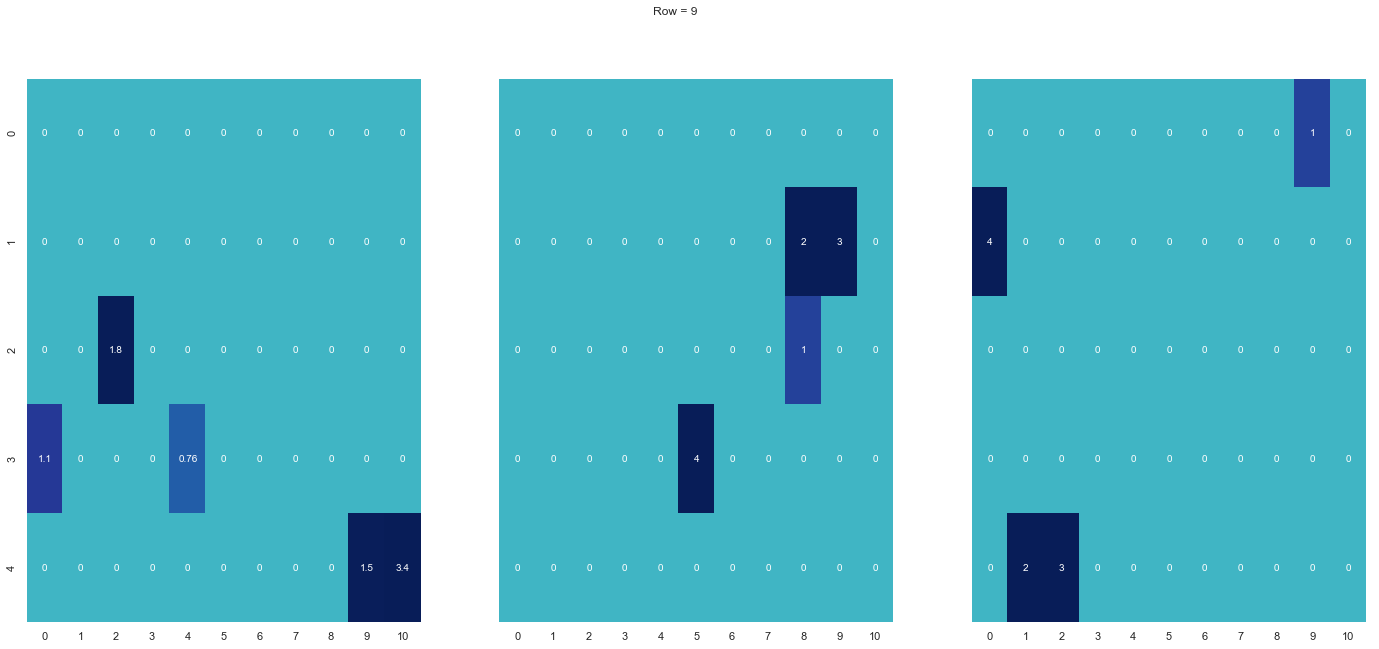

In [15]:
wm_1 = choice(labels_bin["wm"][0])
wm_2 = choice(labels_bin["wm"][1])
wm_3 = choice(labels_bin["wm"][2])
for tdx in range(0,3000):
    print(tdx, end='\r')
    left, center, right = wm_1["data"][tdx], wm_2["data"][tdx], wm_3["data"][tdx]
    l_mask, c_mask, r_mask = np.zeros(left[0].shape), np.zeros(center[0].shape), np.zeros(right[0].shape)
    k = 5
    l_top_k = k_largest_index_argpartition_v1(left[0], k)
    c_top_k = k_largest_index_argpartition_v1(center[0], k)
    r_top_k = k_largest_index_argpartition_v1(right[0], k)
    for i in range(k):
        l_mask[l_top_k[i][0]][l_top_k[i][1]] = left[0][l_top_k[i][0]][l_top_k[i][1]]
        c_mask[c_top_k[i][0]][c_top_k[i][1]] = i
        r_mask[r_top_k[i][0]][r_top_k[i][1]] = i
    
    fig,axn = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(24,10))
    sns.heatmap(l_mask, ax=axn[0], cbar=False, vmin=-1.5, vmax=1.5, cmap="YlGnBu", annot=True)
    sns.heatmap(c_mask, ax=axn[1], cbar=False, vmin=-1.5, vmax=1.5, cmap="YlGnBu", annot=True)
    sns.heatmap(r_mask, ax=axn[2], cbar=False, vmin=-1.5, vmax=1.5, cmap="YlGnBu", annot=True)
    fig.suptitle("Row = {}".format(tdx))
    fig.savefig('./plots/plot_' + str(tdx) + '.png')
    plt.close()

In [ ]:
df = pd.read_csv('mindfulness_summary_rough.csv')

In [ ]:
invalids = df[df["Performance"]<0.95]

In [ ]:
invalids = invalids.values

In [ ]:
j = [str(i[0])+'_'+i[1] for i in invalids]

In [ ]:
len(j)

In [ ]:
j